<a href="https://colab.research.google.com/github/abidshafee/google.colaboratory_projects/blob/master/EURUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This is a program that predict future currency price using artificial recurrent nural network - 
# The artificial recurrent nural network architecture also called 'Long Short Term Memory' or LSTM
# Predicting the closing price of EURUSD currency pair using the past 60 days price.

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [22]:
# geting the eurousd quotes
df = web.DataReader('EURUSD=X', data_source='yahoo', start='2012-01-1', end='2020-7-13')
# view data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,1.296395,1.292257,1.296008,1.296008,0.0,1.296008
2012-01-03,1.306592,1.293628,1.293628,1.294096,0.0,1.294096
2012-01-04,1.307395,1.290206,1.305398,1.305602,0.0,1.305602
2012-01-05,1.294297,1.278527,1.293092,1.293142,0.0,1.293142
2012-01-06,1.281296,1.270406,1.279296,1.279607,0.0,1.279607
...,...,...,...,...,...,...
2020-07-06,1.133658,1.126037,1.131030,1.131286,0.0,1.131286
2020-07-07,1.134559,1.126519,1.127281,1.127523,0.0,1.127523
2020-07-08,1.137268,1.128796,1.133787,1.133915,0.0,1.133915


In [23]:
# number of rows and column in the dataset
df.shape

(2221, 6)

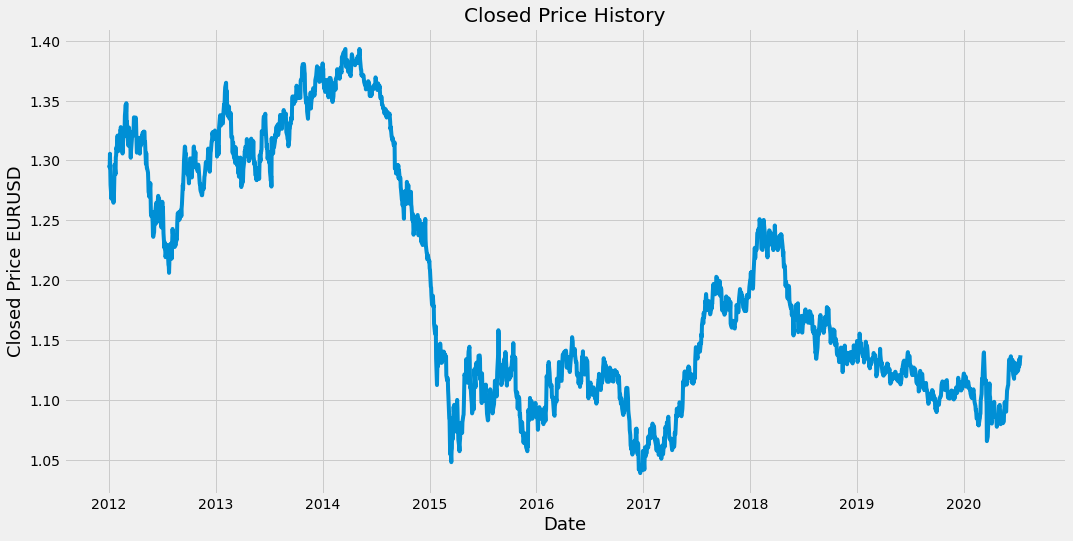

In [24]:
# our dataframe has 260 rows and 6 column except index column
# Visualizing data specially the closing price, because we are gonna built iur model on closed price
plt.figure(figsize = (16,8))
plt.title('Closed Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price EURUSD', fontsize=18)
plt.show()

In [25]:
# creating a new dataframe only with close price column
newdf = df.filter(['Close'])
# now, converting the new dataframe to numpy array
dataset = newdf.values
# dataset.shape
# taking the number of rows to train the model
training_data_len = math.ceil( len(dataset) *0.8)
# using math.ceil to roundup number
training_data_len

1777

In [26]:
# Scaling the data before presenting it to the neural network
# because scaling or normalization of input data is always a good practice
scaler = MinMaxScaler(feature_range=(0, 1))
# transform the data to value between 0 and 1
# Scaled_data will hold the data that is been scaled
scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [40]:
# Creating the training dataset
# first we create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# this will capture index 0 to training_data_len and return all column
# now we will split the data into x_train, y_train dataset
x_train = [] # independent data
y_train = [] # dependent data, deends on x_train

for data in range(60, len(train_data)):
  x_train.append(train_data[data-60:data, 0])
  y_train.append(train_data[data,0])
  if data<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.72579585, 0.72039568, 0.75289471, 0.71770131, 0.67946944,
       0.64679229, 0.67378979, 0.66697947, 0.65909673, 0.68637404,
       0.63737043, 0.64302685, 0.66532689, 0.69923304, 0.72717266,
       0.70452412, 0.74467996, 0.74866258, 0.76739585, 0.76327551,
       0.79580586, 0.77649244, 0.75882655, 0.78509507, 0.77580993,
       0.77298458, 0.77142797, 0.80727256, 0.80727256, 0.81571997,
       0.80395393, 0.7816687 , 0.77483515, 0.7534725 , 0.77288727,
       0.80123398, 0.79491896, 0.80578564, 0.80930629, 0.84260501,
       0.86900688, 0.85192316, 0.87208307, 0.82771026, 0.82821162,
       0.78965684, 0.80083868, 0.77191418, 0.77659009, 0.81472398,
       0.77240072, 0.78460516, 0.75979257, 0.74343413, 0.75930973,
       0.7871049 , 0.80182693, 0.80420108, 0.7988632 , 0.79491896])]
[0.8170152974641605]

[array([0.72579585, 0.72039568, 0.75289471, 0.71770131, 0.67946944,
       0.64679229, 0.67378979, 0.66697947, 0.65909673, 0.68637404,
       0.63737043, 0.64302685, 0.665

In [9]:
# above the first dataset is our x_training dataset which contains past 60 values,
# and below the single row is our y_training dataset that we will predict depending on 60 values of x_train dataset

In [42]:
# now converting the x_train and y_train dataset to numpy array so that we can use them to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
# right now our data is two-dimentional, so we need to reshape the data,
# the reason of reshaping is that the LSTM network expect data to be three dimentional in the form of -
# number of samples, number of time steps, and number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1717, 60, 1)

In [44]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
# now we will compile our model
model.compile(optimizer='adam', loss = 'mean_squared_error')
# the optimizer will improve the model upon loss function, and
# the loss function will measure how well the model did on training

In [46]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1717/1717 [==============================] - 67s 39ms/step - loss: 0.0029


Now We will create a testing dataset

In [55]:
test_data = scaled_data[training_data_len-60: , :]
# creating dataset
x_test = []
y_test = dataset[training_data_len:, :]

for tdata in range(60, len(test_data)):
  x_test.append(test_data[tdata-60:tdata, 0])

In [56]:
# Converting the test data to numpy array to use it in LSTM model
x_test = np.array(x_test)

In [57]:
# Reshaping the test data
# because our data is two-dimentional but LSTM model expect data to be three-dimentional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
# model predicted price
predictions = model.predict(x_test)
# inverse transform the data or we unscaling valuees
predictions = scaler.inverse_transform(predictions)
# here we want the predictions contain the saame dataset that our y_test dataset contains


In [59]:
# evaluating our model using root-mean-square error (rmse) that how accurate the model predict 
# the lower value of rmse indicates a better fit
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.0042972221030845295

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


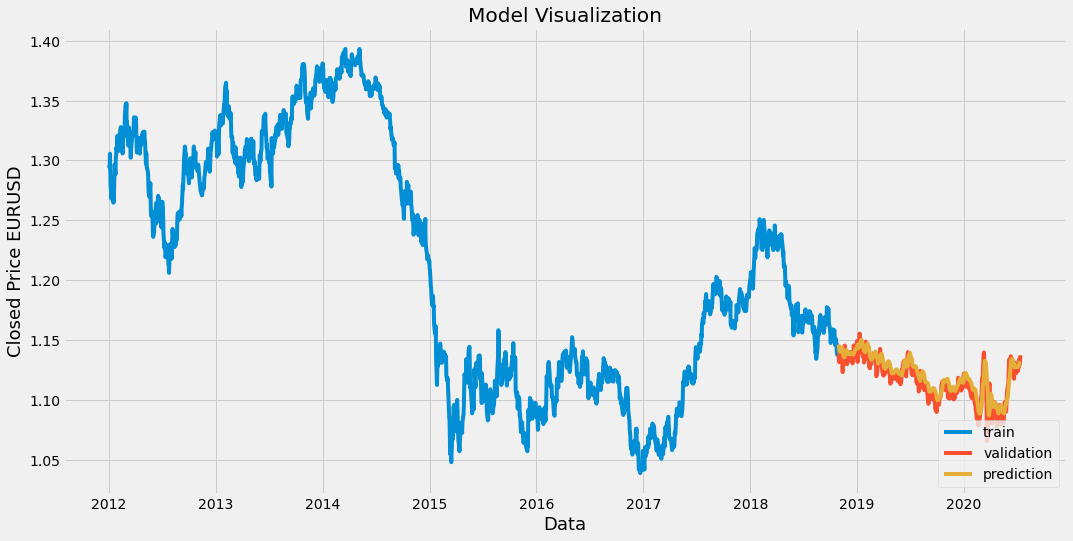

In [60]:
# ploting the data
train = newdf[:training_data_len]
# validation dataset
valid = newdf[training_data_len:]
valid['predictions'] = predictions
# visualizing the data
plt.figure(figsize=(16, 8))
plt.title('Model Visualization')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Closed Price EURUSD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'validation', 'prediction'], loc='lower right')
plt.show()

In [61]:
# valid and predicted price
valid

,Close,predictions
Date,,
2018-10-30,1.137618,1.146356
2018-10-31,1.134636,1.144610
2018-11-01,1.131670,1.142811
2018-11-02,1.140329,1.140852
2018-11-05,1.139757,1.140293
...,...,...
2020-07-06,1.131286,1.127848
2020-07-07,1.127523,1.128886
2020-07-08,1.133915,1.129713


In [21]:
Now we will predict future data using our model
predict_df = web.DataReader('EURUSD=X', data_source='yahoo', start='2019-07-13', end='2020-7-13')